# Chessboard Vision Project  

## 📌 Introduction  
This project is part of the **Computer Vision** course in the Master's in Artificial Intelligence. The goal is to detect chess pieces on a board from images, determine their positions using bounding boxes, and represent them in an 8x8 matrix format. The solution is implemented in Python and follows a structured image processing pipeline.

## 🎯 Task Overview  
- **Input:** Chessboard image  
- **Output:**  
  - Total number of black/white pieces  
  - Bounding boxes around detected pieces  
  - 8x8 matrix representing piece positions  
- **Dataset:** 50 images for development, 10 unseen test images  
- **Deliverables:**  
  - Python script (single file)  
  - Short report (max 2 pages) 

---

In [146]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import math

# Data Directory
dataDir = 'images'

# Define the window size
window_width = 800
window_height = 600

---

## First Image Test

In [147]:
# Function to resize image
def resize_image(image, window_width, window_height):
    height, width = image.shape[:2]
    scaling_factor = min(window_width / width, window_height / height)
    return cv2.resize(image, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)

Image Dimensions: 3072 x 3072
Number of Channels: 3


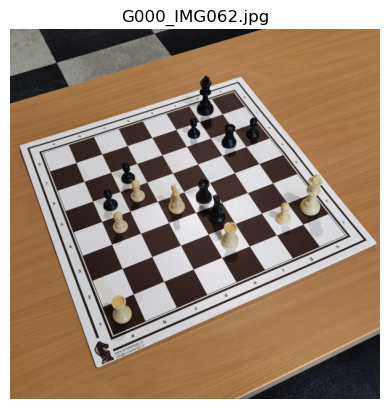

In [148]:
# Read and Display an Image
# Opening an image
img = cv2.imread(os.path.join(dataDir, 'G000_IMG062.jpg'))

# Get the dimensions of the image
height, width, channels = img.shape
print(f'Image Dimensions: {height} x {width}')
print(f'Number of Channels: {channels}')

# Calculate the scaling factor
scaling_factor = min(window_width / width, window_height / height)

# Resize the image
resized_img = resize_image(img, window_width, window_height)

# Display the resized image using matplotlib
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title('G000_IMG062.jpg')
plt.axis('off')
plt.show()

---

## Image Processing

### 1. Convert to Graysacale

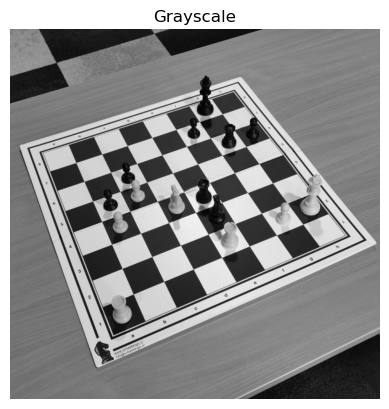

In [149]:
# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize image for display
resized_gray = resize_image(gray, window_width, window_height)

# Display Grayscale Image
plt.imshow(resized_gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.show()

### 2. Apply Gaussian Blur

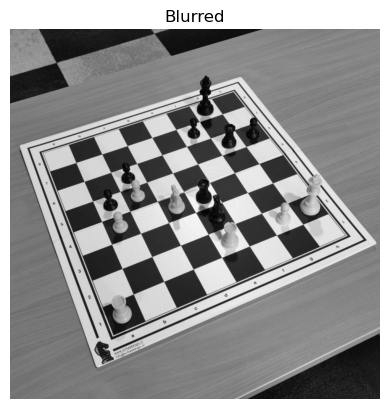

In [150]:
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Resize image for display
resized_blurred = resize_image(blurred, window_width, window_height)

# Display Blurred Image
plt.imshow(resized_blurred, cmap='gray')
plt.title("Blurred")
plt.axis('off')
plt.show()

### 3. Apply Adaptive Thresholding

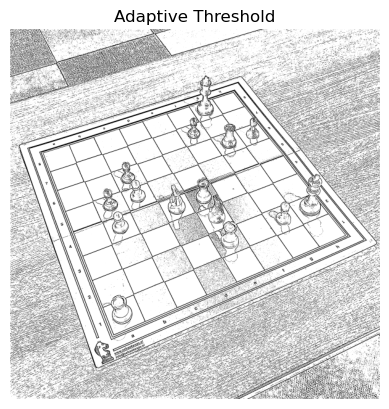

In [151]:
# Apply Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Resize image for display
resized_adaptive_thresh = resize_image(adaptive_thresh, window_width, window_height)

# Display Adaptive Threshold Image
plt.imshow(resized_adaptive_thresh, cmap='gray')
plt.title("Adaptive Threshold")
plt.axis('off')
plt.show()

### 4. Apply Canny Edge Detection

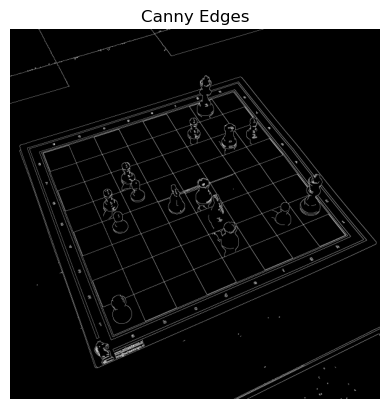

In [152]:
# Apply Canny Edge Detection
edges = cv2.Canny(blurred, 50, 150)

# Resize image for display
resized_edges = resize_image(edges, window_width, window_height)

# Display Canny Edges Image
plt.imshow(resized_edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')
plt.show()

### 5. Apply Sobel Filter

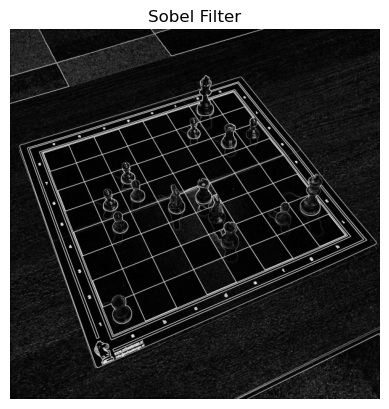

In [153]:
# Apply Sobel filters in x and y directions
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Convert to absolute values
abs_sobelx = cv2.convertScaleAbs(sobelx)
abs_sobely = cv2.convertScaleAbs(sobely)

# Combine the two Sobel gradients
sobel_combined = cv2.addWeighted(abs_sobelx, 1, abs_sobely, 1, 0)

# Resize image for display
resized_sobel = resize_image(sobel_combined, window_width, window_height)

# Display Sobel Filter Image
plt.imshow(resized_sobel, cmap='gray')
plt.title("Sobel Filter")
plt.axis('off')
plt.show()

### Test function

Processing 50 images...


Found chessboard in G000_IMG062.jpg with weights (0.5, 0.5), approx 0.02


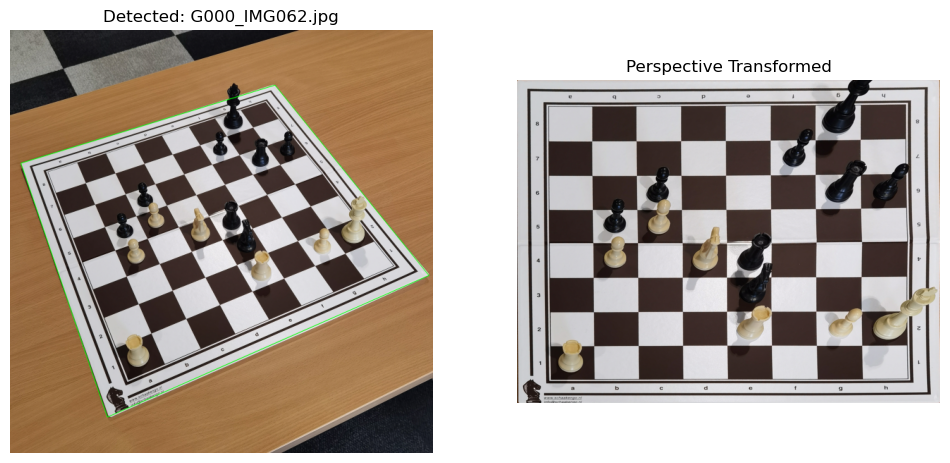

Found chessboard in G000_IMG087.jpg with weights (1.0, 1.0), approx 0.01


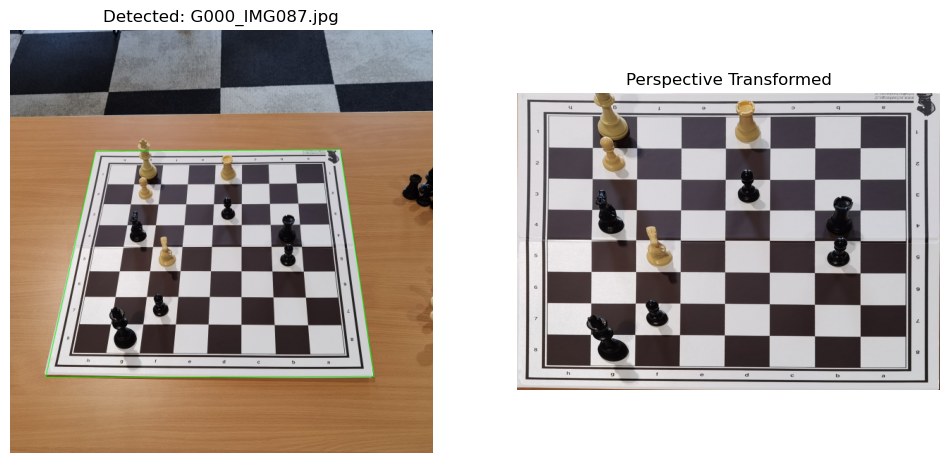

Found chessboard in G000_IMG102.jpg with weights (0.5, 0.5), approx 0.01


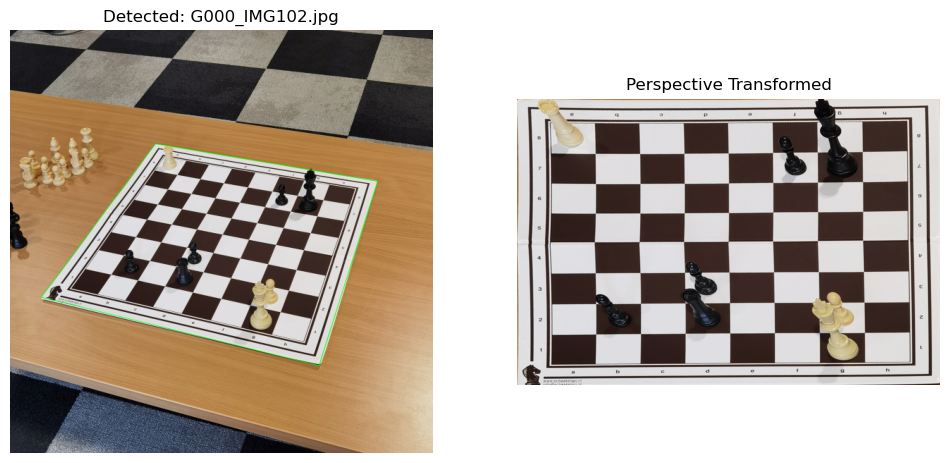

Found chessboard in G006_IMG048.jpg with weights (0.5, 0.5), approx 0.01


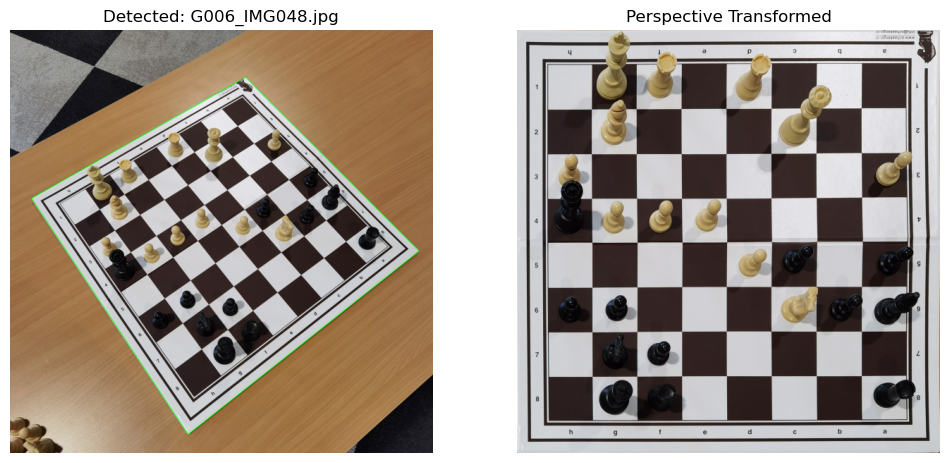

Found chessboard in G006_IMG086.jpg with weights (0.5, 0.5), approx 0.02


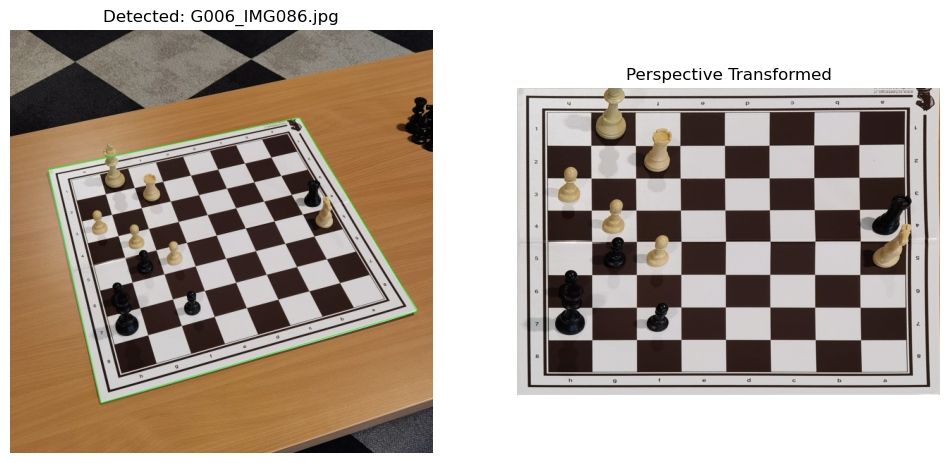

Found chessboard in G006_IMG119.jpg with weights (0.7, 0.7), approx 0.01


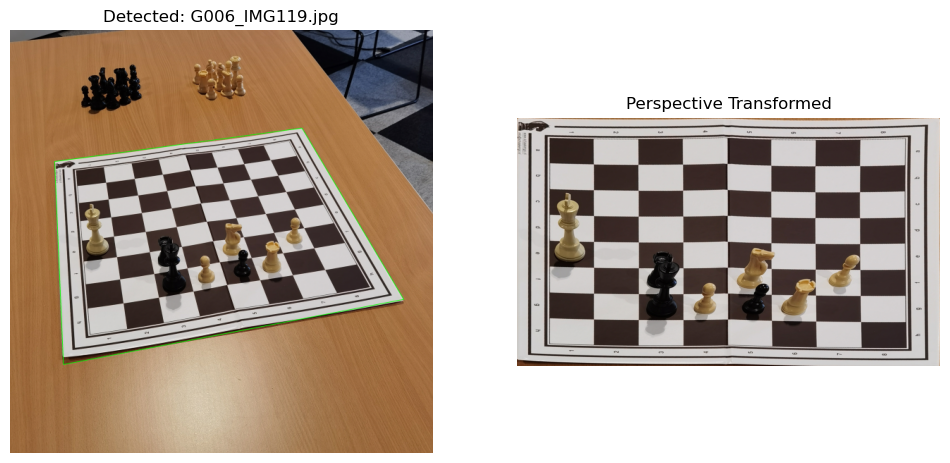

Found chessboard in G019_IMG082.jpg with weights (0.5, 0.5), approx 0.04


In [ ]:
def process_image(image_path, display=True):
    """
    Process chessboard image to detect and extract the chessboard.
    """
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return None
    
    # Convert to grayscale and blur
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Sobel filters
    sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    abs_sobelx = cv2.convertScaleAbs(sobelx)
    abs_sobely = cv2.convertScaleAbs(sobely)
    
    # Try different Sobel weights
    weights = [(0.5, 0.5), (0.7, 0.7), (1.0, 1.0), (1.5, 1.5), (2.0, 2.0)]
    chessboard_contour = None
    
    # Find chessboard contour
    for wx, wy in weights:
        sobel_combined = cv2.addWeighted(abs_sobelx, wx, abs_sobely, wy, 0)
        _, thresh_sobel = cv2.threshold(sobel_combined, 50, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh_sobel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contour_img = img.copy()
            
        # Sort by area, get largest
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:25]
            
        for contour in contours:
            peri = cv2.arcLength(contour, True)
            for approx_param in [0.01, 0.02, 0.03, 0.04, 0.05]:
                approx = cv2.approxPolyDP(contour, approx_param * peri, True)
                
                # Check if it's a quadrilateral with appropriate area
                if len(approx) == 4 and cv2.contourArea(approx) > (img.shape[0] * img.shape[1]) * 0.15:
                    chessboard_contour = approx
                    print(f"Found chessboard in {os.path.basename(image_path)} with weights ({wx}, {wy}), approx {approx_param}")
                    break
            if chessboard_contour is not None:
                break

            
        if chessboard_contour is not None:
            break
    
    # Process the chessboard if found
    if chessboard_contour is not None:
        cv2.drawContours(contour_img, [chessboard_contour], -1, (0, 255, 0), 3)
        
        # Perspective transform
        rect = np.zeros((4, 2), dtype="float32")
        pts = chessboard_contour.reshape(4, 2)
        
        # Sort corners - top to bottom
        y_sorted = pts[np.argsort(pts[:, 1]), :] 
        top_two = y_sorted[:2]
        bottom_two = y_sorted[2:]
        
        # Sort left to right
        top_left = top_two[np.argmin(top_two[:, 0])]
        top_right = top_two[np.argmax(top_two[:, 0])]
        bottom_left = bottom_two[np.argmin(bottom_two[:, 0])]
        bottom_right = bottom_two[np.argmax(bottom_two[:, 0])]
        
        # Assign corners
        rect[0] = top_left
        rect[1] = top_right
        rect[2] = bottom_right
        rect[3] = bottom_left
        
        # Calculate dimensions
        width_top = np.sqrt(((rect[0][0] - rect[1][0])**2) + ((rect[0][1] - rect[1][1])**2))
        width_bottom = np.sqrt(((rect[2][0] - rect[3][0])**2) + ((rect[2][1] - rect[3][1])**2))
        width = int(max(width_top, width_bottom))
        
        height_left = np.sqrt(((rect[0][0] - rect[3][0])**2) + ((rect[0][1] - rect[3][1])**2))
        height_right = np.sqrt(((rect[1][0] - rect[2][0])**2) + ((rect[1][1] - rect[2][1])**2))
        height = int(max(height_left, height_right))
        
        # Force square if dimensions are close
        if abs(width - height) < min(width, height) * 0.2:
            size = max(width, height)
            width, height = size, size
        
        # Check minimum size
        if width < 200 or height < 200:
            print(f"Warning: Small transform size in {os.path.basename(image_path)} ({width}x{height})")
            if min(width, height) < 50:
                print(f"Transform too small for {os.path.basename(image_path)}, skipping")
                return None
        
        # Define destination points
        dst = np.array([
            [0, 0],
            [width - 1, 0],
            [width - 1, height - 1],
            [0, height - 1]
        ], dtype="float32")
        
        # Apply transform
        M = cv2.getPerspectiveTransform(rect, dst)
        warped = cv2.warpPerspective(img, M, (width, height))
        
        # Check if transform failed
        if np.all(warped == warped[0, 0]):
            print(f"Error: Uniform color in warped image for {os.path.basename(image_path)}")
            
            # Try fallback method
            print(f"Trying fallback corner detection for {os.path.basename(image_path)}")
            
            s = pts.sum(axis=1)
            rect[0] = pts[np.argmin(s)]
            rect[2] = pts[np.argmax(s)]
            
            diff = np.diff(pts, axis=1)
            rect[1] = pts[np.argmin(diff)]
            rect[3] = pts[np.argmax(diff)]
            
            M = cv2.getPerspectiveTransform(rect, dst)
            warped = cv2.warpPerspective(img, M, (width, height))
            
            if np.all(warped == warped[0, 0]):
                print(f"Fallback also failed for {os.path.basename(image_path)}")
                return None
            else:
                print(f"Fallback succeeded for {os.path.basename(image_path)}")
        
        # Display results if requested
        if display:
            resized_contour_img = resize_image(contour_img, window_width, window_height)
            resized_warped = resize_image(warped, window_width, window_height)
            
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(resized_contour_img, cv2.COLOR_BGR2RGB))
            plt.title(f"Detected: {os.path.basename(image_path)}")
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(resized_warped, cv2.COLOR_BGR2RGB))
            plt.title("Perspective Transformed")
            plt.axis('off')
            plt.show()
        
        return warped
    else:
        print(f"No chessboard contour found in {os.path.basename(image_path)}")
        return None

def process_all_images(directory, max_display=5):
    """
    Process all images in directory.
    """
    image_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]
    results = {}
    display_count = 0
    
    print(f"Processing {len(image_files)} images...")
    
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        display = display_count < max_display
        
        warped = process_image(image_path, display)
        
        success = warped is not None
        results[image_file] = success
        
        if success and display:
            display_count += 1
    
    # Print summary
    success_count = sum(results.values())
    print(f"\nSummary: Successfully processed {success_count} out of {len(image_files)} images ({success_count/len(image_files)*100:.1f}%)")
    
    # List failed images
    failed_images = [img for img, success in results.items() if not success]
    if failed_images:
        print("\nFailed images:")
        for img in failed_images:
            print(f"- {img}")
    
    return results

# Process all images in the directory
results = process_all_images(dataDir, 50)

Found chessboard in G006_IMG119.jpg with weights (0.7, 0.7), approx 0.01


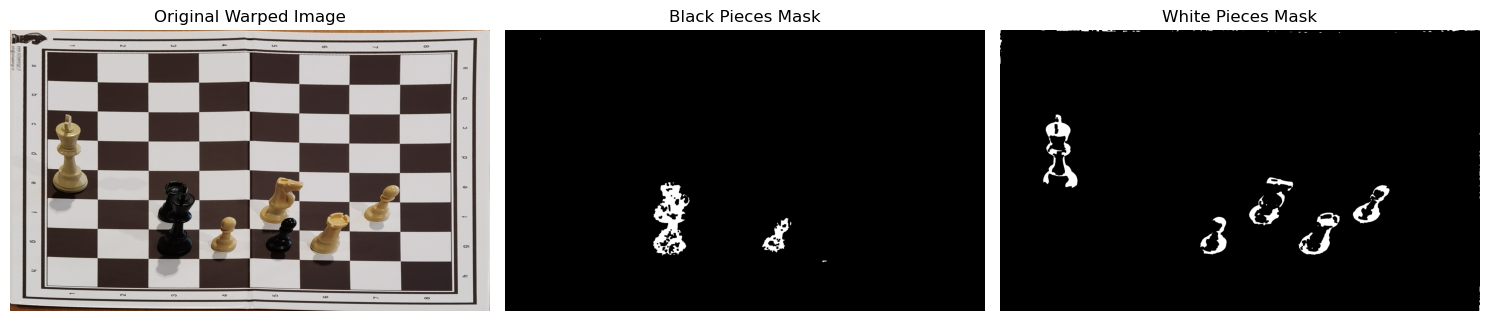

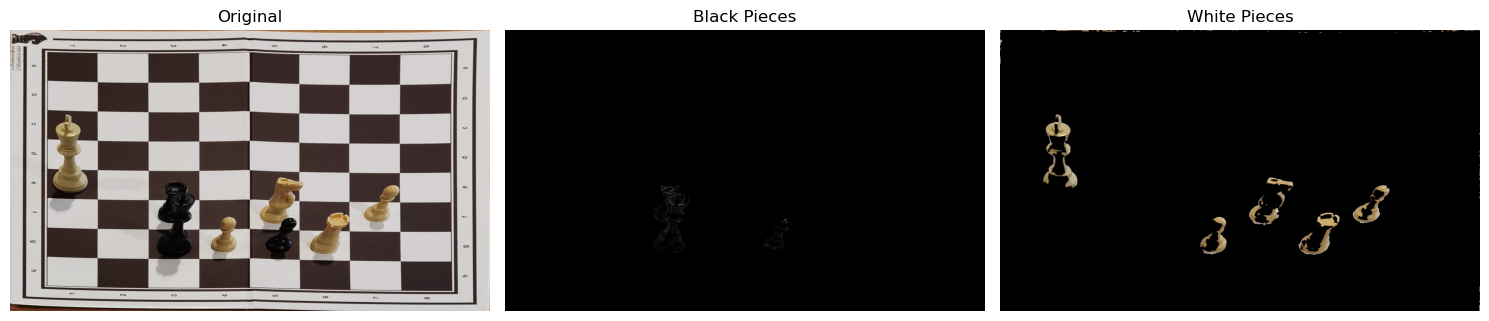

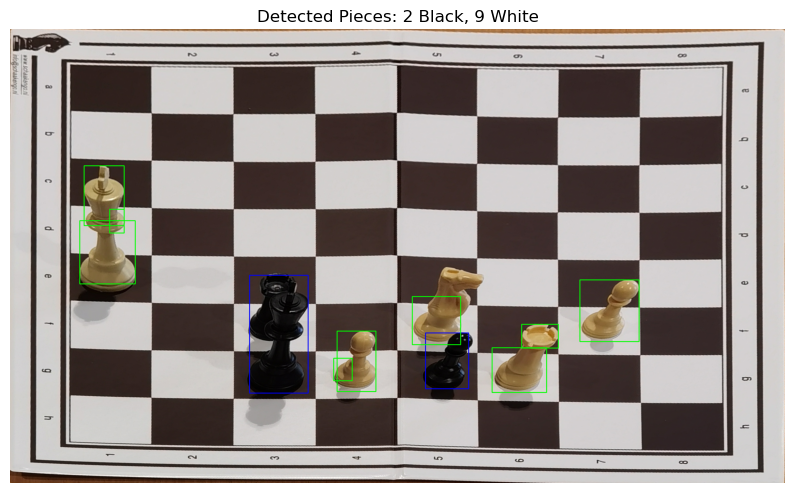

In [94]:
def test_color_mask(image_path, display_intermediate=True):
    """
    Process image and detect both black and white chess pieces at once.
    """
    # Process image to get warped chessboard
    warped = process_image(image_path, display=False)
    
    if warped is None:
        print(f"Failed to get the warped image for {os.path.basename(image_path)}")
        return None, None, None
    
    blurred = warped

    # Convert to HSV for color detection
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    
    # Create masks for both colors at once
    # Black pieces - dark with low saturation
    black_lower = np.array([0, 0, 0])
    black_upper = np.array([180, 60, 30])
    black_mask = cv2.inRange(hsv, black_lower, black_upper)
    
    # White pieces
    white_lower = np.array([15, 30, 135])
    white_upper = np.array([35, 135, 225])
    white_mask = cv2.inRange(hsv, white_lower, white_upper)
    
    # Apply morphological operations to clean up the masks
    kernel_open = np.ones((3, 3), np.uint8)
    kernel_close = np.ones((7, 7), np.uint8)
    
    # Process black mask
    black_mask = cv2.morphologyEx(black_mask, cv2.MORPH_CLOSE, kernel_close)
    black_mask = cv2.morphologyEx(black_mask, cv2.MORPH_OPEN, kernel_open)
    
    # Process white mask
    white_mask = cv2.morphologyEx(white_mask, cv2.MORPH_CLOSE, kernel_close)
    white_mask = cv2.morphologyEx(white_mask, cv2.MORPH_OPEN, kernel_open)
    
    # Apply masks to original image
    black_result = cv2.bitwise_and(blurred, blurred, mask=black_mask)
    white_result = cv2.bitwise_and(blurred, blurred, mask=white_mask)
    
    # Display results if requested
    if display_intermediate:
        # Show masks side by side
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
        plt.title("Original Warped Image")
        plt.axis("off")
        
        plt.subplot(1, 3, 2)
        plt.imshow(black_mask, cmap='gray')
        plt.title("Black Pieces Mask")
        plt.axis("off")
        
        plt.subplot(1, 3, 3)
        plt.imshow(white_mask, cmap='gray')
        plt.title("White Pieces Mask")
        plt.axis("off")
        
        plt.tight_layout()
        plt.show()
        
        # Show masked results
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
        plt.title("Original")
        plt.axis("off")
        
        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(black_result, cv2.COLOR_BGR2RGB))
        plt.title("Black Pieces")
        plt.axis("off")
        
        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(white_result, cv2.COLOR_BGR2RGB))
        plt.title("White Pieces")
        plt.axis("off")
        
        plt.tight_layout()
        plt.show()
        
        # Create a combined image with both black and white piece bounding boxes
        contour_img = warped.copy()
        black_count = 0
        white_count = 0
        
        # Process black contours
        black_contours, _ = cv2.findContours(black_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in black_contours:
            area = cv2.contourArea(contour)
            if area >= 1500:
                x, y, w, h = cv2.boundingRect(contour)
                aspect_ratio = float(w) / h if h > 0 else 0
                if 0.25 <= aspect_ratio <= 2.0:
                    black_count += 1
                    cv2.rectangle(contour_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # Process white contours
        white_contours, _ = cv2.findContours(white_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in white_contours:
            area = cv2.contourArea(contour)
            if area >= 1500:
                x, y, w, h = cv2.boundingRect(contour)
                aspect_ratio = float(w) / h if h > 0 else 0
                if 0.25 <= aspect_ratio <= 2.0:
                    white_count += 1
                    cv2.rectangle(contour_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
        plt.title(f"Detected Pieces: {black_count} Black, {white_count} White")
        plt.axis("off")
        plt.show()
    
    return warped, black_mask, white_mask

warped, black_mask, white_mask = test_color_mask(os.path.join(dataDir, 'G006_IMG119.jpg'))

## Grid for chessboard

Found chessboard in G000_IMG062.jpg with weights (0.7, 0.7), approx 0.02


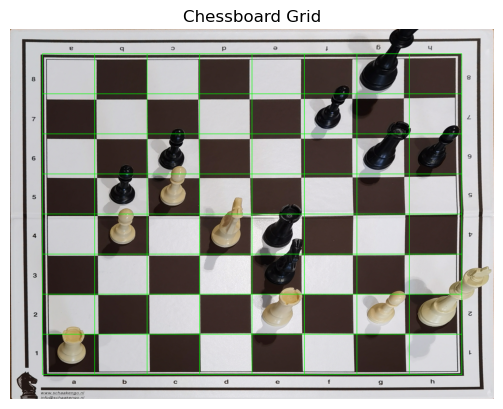

In [42]:
def draw_grid(image, h_margin=20, v_margin=20, line_color=(0, 255, 0), line_thickness=2):
    """
    Draws a grid with 9 vertical and 9 horizontal lines on the given chessboard image,
    using separate margins for horizontal (left/right) and vertical (top/bottom) edges.
    
    Parameters:
        image: Input chessboard image as a NumPy array.
        h_margin: Horizontal margin (applied on left/right sides) for vertical lines.
        v_margin: Vertical margin (applied on top/bottom) for horizontal lines.
        line_color: Color of the grid lines.
        line_thickness: Thickness of the grid lines.
    
    Returns:
        A new image with the grid drawn.
    """
    grid_img = image.copy()
    height, width = grid_img.shape[:2]

    # Calculate spacing using separate margins
    x_spacing = (width - 2 * h_margin) / 8
    y_spacing = (height - 2 * v_margin) / 8

    # Draw vertical lines using horizontal margin
    for i in range(9):
        x = int(h_margin + i * x_spacing)
        pt1 = (x, v_margin)
        pt2 = (x, height - v_margin)
        cv2.line(grid_img, pt1, pt2, line_color, line_thickness)

    # Draw horizontal lines using vertical margin
    for i in range(9):
        y = int(v_margin + i * y_spacing)
        pt1 = (h_margin, y)
        pt2 = (width - h_margin, y)
        cv2.line(grid_img, pt1, pt2, line_color, line_thickness)

    return grid_img
# Example usage:
# Assuming 'warped' is your perspective-transformed chessboard image from process_image():
if __name__ == "__main__":
    test_image = cv2.imread(os.path.join(dataDir, 'G000_IMG062.jpg'))
    if test_image is not None:
        warped = process_image(os.path.join(dataDir, 'G000_IMG062.jpg'), display=False)
        if warped is not None:
            grid_image = draw_grid(warped, 170, 130)  # Adjust margin value as needed
            plt.imshow(cv2.cvtColor(grid_image, cv2.COLOR_BGR2RGB))
            plt.title("Chessboard Grid")
            plt.axis("off")
            plt.show()